In [1]:
import h5py
import pandas as pd

In [2]:
f = h5py.File('../data/processed-pythia82-lhc13-all-pt1-50k-r1_h022_e0175_t220_nonu_withPars_truth.z', 'r')
treeArray = f['t_allpar_new'][()]

In [3]:
features = ['j1_ptrel','j1_etarot','j1_phirot','j1_erel','j1_deltaR','j1_costhetarel','j1_pdgid','j1_pt']
labels = ['j_g','j_q','j_w','j_z','j_t']

In [4]:
feat_df = pd.DataFrame(treeArray,columns=list(set(features)))
label_df = pd.DataFrame(treeArray,columns=list(set(labels)))

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LogNorm

In [6]:
df = pd.concat([feat_df,label_df],axis=1)
df.head()

,j1_pdgid,j1_pt,j1_etarot,j1_phirot,j1_deltaR,j1_costhetarel,j1_ptrel,j1_erel,j_q,j_t,j_z,j_w,j_g
0,111.0,1.064380,-0.068588,-0.201170,0.135378,-0.068480,0.001060,0.001084,0,0,1,0,0
1,111.0,0.570535,-0.113826,-0.348590,0.321080,-0.113337,0.000626,0.000640,0,1,0,0,0
2,111.0,48.173332,0.003166,0.001577,0.061471,0.003166,0.046280,0.045609,0,0,0,1,0
3,211.0,84.760277,-0.015675,-0.005436,0.015611,-0.015673,0.132881,0.133103,0,0,0,0,1
4,211.0,1.663202,-0.350233,-0.006246,0.328146,-0.336582,0.001762,0.001496,0,1,0,0,0


In [7]:
# df['w_c'] = df['j1_pt']*df['j_w']*df['j1_ptrel']
# df['q_c'] = df['j1_pt']*df['j_q']
# df['z_c'] = df['j1_pt']*df['j_z']
# df['t_c'] = df['j1_pt']*df['j_t']
# df['g_c'] = df['j1_pt']*df['j_g']

# Start From Here

In [8]:
# min-max normalization to [-1,1] for phi & eta
temp_df = df.copy()
for col in features[1:3]:
    temp_df[col] = -1 + 2*(temp_df[col]-temp_df[col].min())/(temp_df[col].max()-temp_df[col].min())
temp_df

,j1_pdgid,j1_pt,j1_etarot,j1_phirot,j1_deltaR,j1_costhetarel,j1_ptrel,j1_erel,j_q,j_t,j_z,j_w,j_g
0,111.0,1.064380,-0.060395,-0.138059,0.135378,-0.068480,0.001060,0.001084,0,0,1,0,0
1,111.0,0.570535,-0.072006,-0.234360,0.321080,-0.113337,0.000626,0.000640,0,1,0,0,0
2,111.0,48.173332,-0.041979,-0.005616,0.061471,0.003166,0.046280,0.045609,0,0,0,1,0
3,211.0,84.760277,-0.046815,-0.010197,0.015611,-0.015673,0.132881,0.133103,0,0,0,0,1
4,211.0,1.663202,-0.132683,-0.010726,0.328146,-0.336582,0.001762,0.001496,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5119904,111.0,3.329199,-0.026894,-0.075199,0.071287,0.061860,0.003359,0.003480,0,0,0,0,1
5119905,111.0,3.756212,-0.041913,-0.184195,0.243789,0.003421,0.003650,0.004210,0,0,0,1,0
5119906,2212.0,24.412260,-0.043495,-0.164942,0.205047,-0.002743,0.022742,0.022763,0,0,1,0,0
5119907,111.0,2.873118,-0.093940,-0.113465,0.215792,-0.196689,0.002943,0.003270,0,0,0,0,1


Text(0, 0.5, 'j1_phirot')

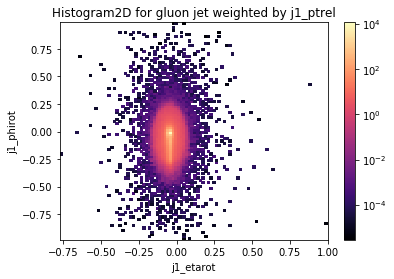

In [9]:
# try plot for Gluon
_,_,_,img = plt.hist2d(x=temp_df[temp_df['j_g']==1].j1_etarot, y=temp_df[temp_df['j_g']==1].j1_phirot,weights=temp_df[temp_df['j_g']==1].j1_ptrel,bins=100,cmap='magma',norm=LogNorm())
img
plt.colorbar()
plt.title('Histogram2D for gluon jet weighted by j1_ptrel')
plt.xlabel('j1_etarot')
plt.ylabel('j1_phirot')